In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import numpy as np
from pathlib import Path

In [4]:
path_1 = Path('/Users/oleseifert/Documents/Techlabs/SoSe-21-Team-10_Main/data/raw')
df = pd.read_csv(path_1.joinpath('2000-2002.csv'), parse_dates=True)

In [5]:
df.head()

,date,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,2000-01-01,1001,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,9.50,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
1,2000-01-02,1001,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,10.18,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,NaN
2,2000-01-03,1001,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,7.41,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,NaN
3,2000-01-04,1001,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,15.92,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,2000-01-05,1001,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,13.48,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,NaN


In [6]:
df_proph = df[['date', 'score']]

# Rename the columns so that the Prophet model works

In [11]:
df_proph.rename(columns = {'date': 'ds'}, inplace=True)

In [12]:
df_proph.rename(columns = {'score': 'y'}, inplace=True)

In [15]:
future = model.make_future_dataframe(periods=365)

In [16]:
df_proph.count

<bound method DataFrame.count of               ds    y
0     2000-01-01  NaN
1     2000-01-02  NaN
2     2000-01-03  NaN
3     2000-01-04  1.0
4     2000-01-05  NaN
...          ...  ...
1091  2002-12-27  NaN
1092  2002-12-28  NaN
1093  2002-12-29  NaN
1094  2002-12-30  NaN
1095  2002-12-31  0.0

[1096 rows x 2 columns]>

In [17]:
train = df_proph.iloc[0:767,:]

In [21]:
test = df_proph.iloc[767:,:]

In [24]:
model2 = Prophet()
model2.fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
model_predict = model2.predict(test)

ValueError: Boolean array expected for the condition, not object

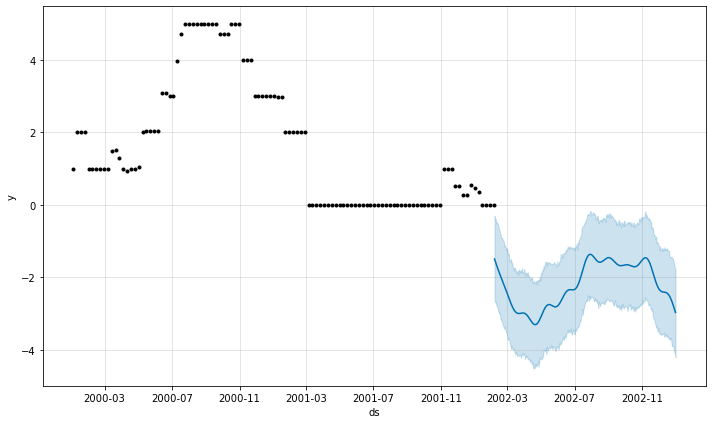

In [29]:
fig1 = model2.plot(model_predict)
fig1 = 

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


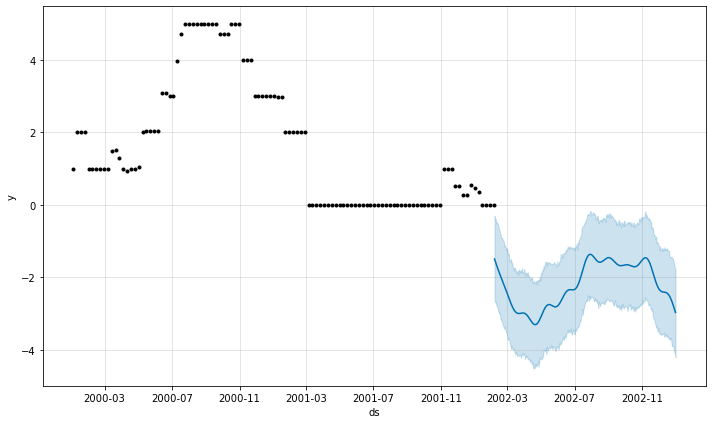

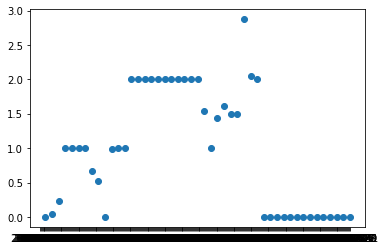

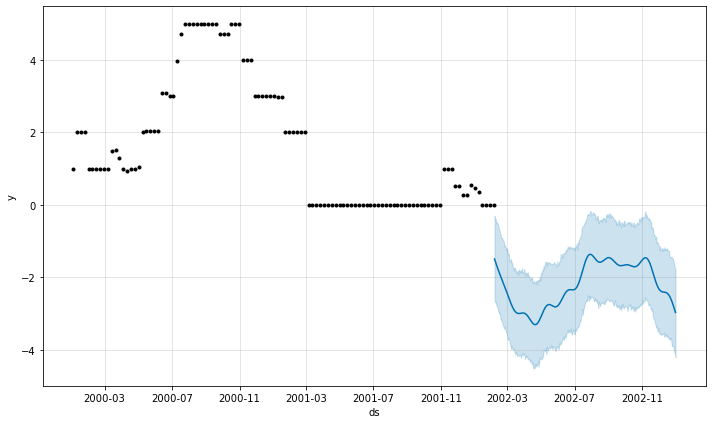

In [42]:
plt.scatter(test.ds, test.y)

In [43]:
model_predict.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2002-02-06,-0.957536,-2.590178,-0.300555,-0.957536,-0.957536,-0.536621,-0.536621,-0.536621,-0.536621,-0.536621,-0.536621,0.0,0.0,0.0,-1.494157
1,2002-02-07,-0.965140,-2.697575,-0.383412,-0.965140,-0.965140,-0.576034,-0.576034,-0.576034,-0.576034,-0.576034,-0.576034,0.0,0.0,0.0,-1.541175
2,2002-02-08,-0.972744,-2.664235,-0.384158,-0.972744,-0.972744,-0.614985,-0.614985,-0.614985,-0.614985,-0.614985,-0.614985,0.0,0.0,0.0,-1.587729
3,2002-02-09,-0.980348,-2.749229,-0.510293,-0.980348,-0.980348,-0.653288,-0.653288,-0.653288,-0.653288,-0.653288,-0.653288,0.0,0.0,0.0,-1.633636
4,2002-02-10,-0.987952,-2.798741,-0.493727,-0.987952,-0.987952,-0.690797,-0.690797,-0.690797,-0.690797,-0.690797,-0.690797,0.0,0.0,0.0,-1.678749


In [44]:
model3 = Prophet()
model3.fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [45]:
future3 = model3.make_future_dataframe(periods=329)

In [46]:
forecast3 = model3.predict(future3)

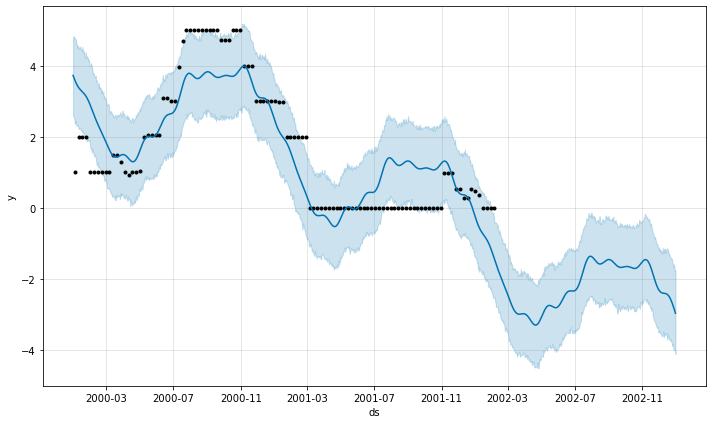

In [47]:
fig1 = model3.plot(forecast3)

# Trying to do the same with the interpolated dataframe

In [53]:
df_prep = df.set_index('date')

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
count,1096.0,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,157.000000
mean,1001.0,3.445675,100.353513,9.899553,17.590109,12.072974,12.084708,24.187947,11.652473,12.535575,17.496131,2.088248,2.965803,1.215803,1.749936,4.093741,5.845547,2.280155,3.565137,1.447690
std,0.0,7.122636,0.470983,4.457553,8.742398,7.996367,7.975243,9.009391,8.709633,3.480876,8.867598,0.693446,0.997218,0.593267,0.732836,1.253095,1.416161,1.330326,1.224634,1.586131
min,1001.0,0.000000,98.500000,1.630000,-3.950000,-10.500000,-10.150000,-0.150000,-8.610000,2.560000,-4.190000,0.740000,1.090000,0.020000,0.450000,1.110000,2.180000,0.040000,1.040000,0.000000
25%,1001.0,0.000000,100.050000,5.970000,10.622500,6.155000,6.157500,17.462500,4.517500,10.237500,10.515000,1.620000,2.260000,0.830000,1.250000,3.230000,4.950000,1.260000,2.650000,0.000000
50%,1001.0,0.350000,100.320000,9.840000,18.840000,13.605000,13.605000,25.075000,12.845000,12.610000,18.685000,1.990000,2.740000,1.260000,1.630000,4.000000,5.760000,2.160000,3.460000,1.000000
75%,1001.0,3.472500,100.650000,13.752500,25.345000,18.920000,18.920000,31.632500,19.897500,15.092500,25.337500,2.440000,3.510000,1.610000,2.082500,4.870000,6.580000,3.170000,4.370000,2.000000
max,1001.0,65.320000,102.300000,18.410000,32.610000,23.720000,23.720000,41.900000,24.940000,22.750000,32.890000,6.180000,8.190000,4.850000,7.370000,10.690000,14.040000,8.520000,12.370000,5.000000


In [58]:
path_1 = Path('/Users/oleseifert/Documents/Techlabs/SoSe-21-Team-10_Main/data/raw')
df_prep = pd.read_csv(path_1.joinpath('2000-2002.csv'), index_col='date', parse_dates=True)

In [59]:
df_prep.interpolate(method='time', inplace=True)

In [60]:
df_prep.dropna(how='any', inplace=True)

In [62]:
df_prep.isna().sum()

fips           0
PRECTOT        0
PS             0
QV2M           0
T2M            0
T2MDEW         0
T2MWET         0
T2M_MAX        0
T2M_MIN        0
T2M_RANGE      0
TS             0
WS10M          0
WS10M_MAX      0
WS10M_MIN      0
WS10M_RANGE    0
WS50M          0
WS50M_MAX      0
WS50M_MIN      0
WS50M_RANGE    0
score          0
dtype: int64

In [63]:
df_prep.reset_index(inplace=True)

In [70]:
df_intpol_proh = df_prep[['date', 'score']]

In [76]:
df_intpol_proh.head()

,ds,y
0,2000-01-04,1.000000
1,2000-01-05,1.142857
2,2000-01-06,1.285714
3,2000-01-07,1.428571
4,2000-01-08,1.571429


In [75]:
df_intpol_proh.rename(columns = {'score': 'y'}, inplace=True)

/Users/oleseifert/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [77]:
train_intpol = df_intpol_proh.iloc[0:767,:]

In [78]:
model_intpol = Prophet()
model_intpol.fit(train_intpol)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [79]:
future_intpol = model_intpol.make_future_dataframe(periods=369)

In [80]:
forecast_intpol = model_intpol.predict(future_intpol)

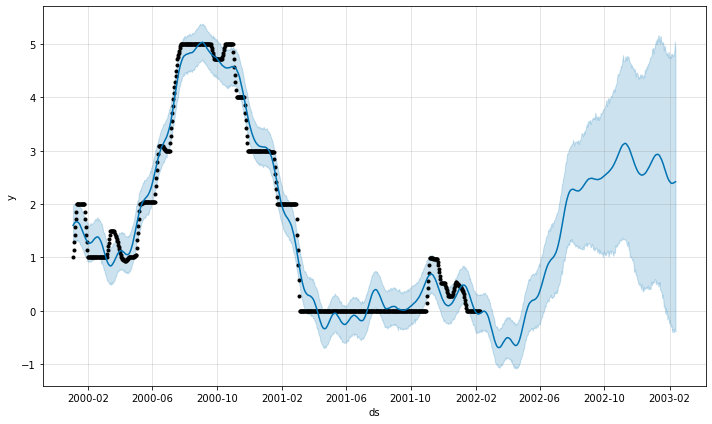

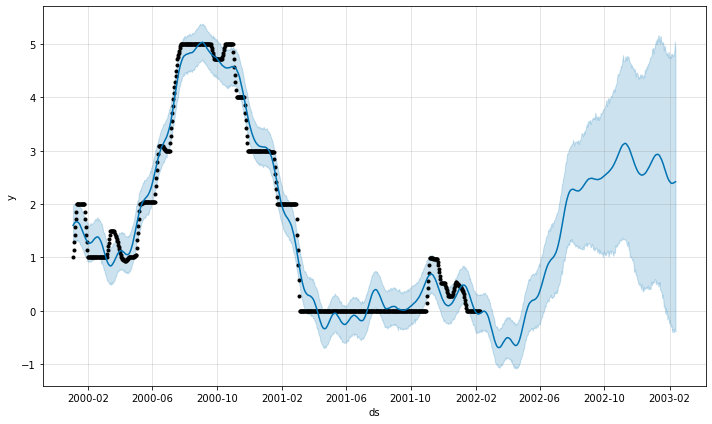

In [81]:
model_intpol.plot(forecast_intpol)